# Unsupervised learning

- Dimension reduction: PCA, LDA, SVD
- Clustering: KMeans Clustering, DBSCAN
- Clustering evaluation

## Dimensionality reduction

In [2]:
from IPython.display import Image

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd

-----

In [4]:
iris = datasets.load_iris()

In [5]:
data = iris['data']

In [6]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
df = pd.DataFrame(data, columns = iris['feature_names'])

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['target'] = iris['target']

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


-----

## PCA

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components = 2)

In [13]:
data_scaled = StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)' : 'petal width (cm)'])

In [14]:
pca_data = pca.fit_transform(data_scaled)

In [15]:
data_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [16]:
pca_data[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

-----

In [17]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline

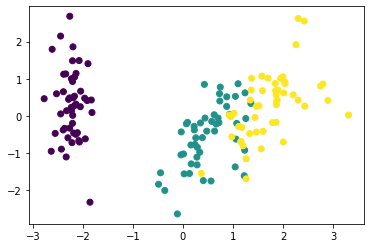

In [19]:
plt.scatter(pca_data[:,0], pca_data[:, 1], c = df['target'])

In [21]:
pca = PCA(n_components = 0.99)

In [22]:
pca_data = pca.fit_transform(data_scaled)

In [23]:
pca_data[:5]

array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ]])

-----

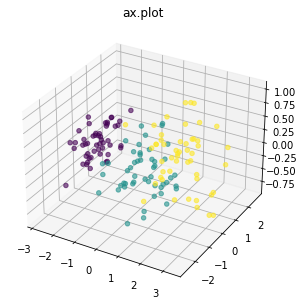

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

sample_size = 50
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], alpha=0.6, c=df['target'])
plt.savefig('./tmp.svg')
plt.title("ax.plot")
plt.show()

-----

## LDA Dimension Reduction

Linear Discriminant Analysis (LDA): A method of linear discriminant analysis (similar to PCA)

- LDA reduces dimensionality in a way that maximizes the ratio of inter-class variance to intra-class variance to find the axis that maximizes class separation.

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [34]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
lda = LinearDiscriminantAnalysis(n_components = 2)

In [36]:
data_scaled = StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)' : 'petal width (cm)'])

In [37]:
lda_data = lda.fit_transform(data_scaled, df['target'])

In [38]:
lda_data[:5]

array([[ 8.06179978,  0.30042062],
       [ 7.12868772, -0.78666043],
       [ 7.48982797, -0.26538449],
       [ 6.81320057, -0.67063107],
       [ 8.13230933,  0.51446253]])

-----

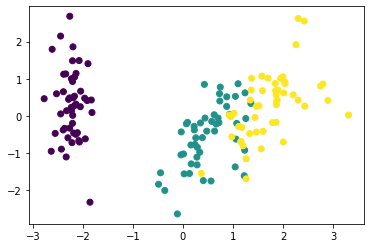

In [39]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['target'])

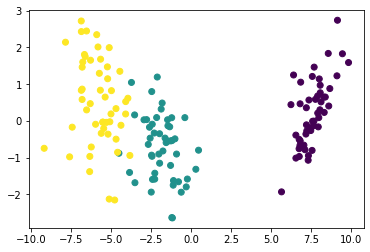

In [40]:
plt.scatter(lda_data[:, 0], lda_data[:, 1], c=df['target'])

-----

### SVD (Singular Value Decomposition)

- Algorithm used in product recommendation system (recommendation system)
- Singular value decomposition.
- It is a dimensionality reduction technique similar to PCA.
- The scikit-learn package uses truncated SVD (aka LSA).


In [41]:
from sklearn.decomposition import TruncatedSVD

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
data_scaled = StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])

In [43]:
svd = TruncatedSVD(n_components = 2)

In [44]:
svd_data = svd.fit_transform(data_scaled)

-----

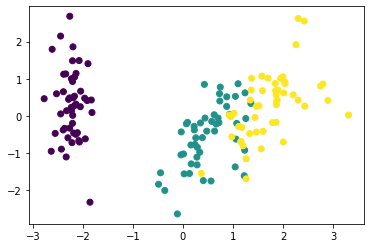

In [45]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['target'])

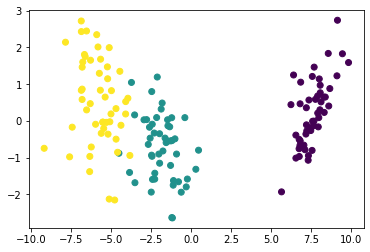

In [46]:
plt.scatter(lda_data[:, 0], lda_data[:, 1], c=df['target'])

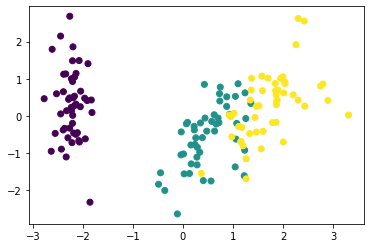

In [47]:
plt.scatter(svd_data[:, 0], svd_data[:, 1], c=df['target'])

-----

## Clustering

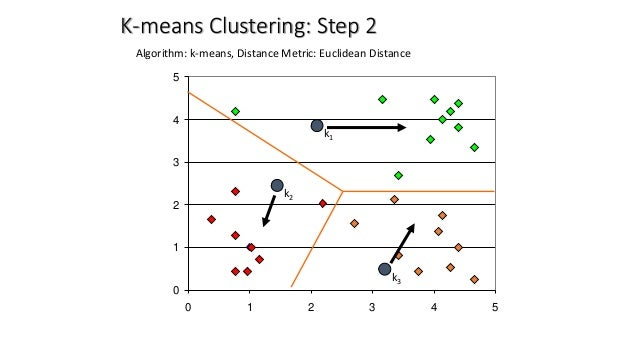

In [48]:
Image('https://image.slidesharecdn.com/patternrecognitionbinoy-06-kmeansclustering-160317135729/95/pattern-recognition-binoy-k-means-clustering-13-638.jpg')

-----

### K-Means Clustering

This is the most popular algorithm for clustering. It is a clustering technique that selects the closest points based on the centroid.

**For instance**

- Classification of spam texts
- News article classification

In [49]:
from sklearn.cluster import KMeans

In [50]:
kmeans = KMeans(n_clusters = 3)

In [51]:
cluster_data = kmeans.fit_transform(df.loc[:, 'sepal length (cm)' : 'petal width (cm)'])

In [52]:
cluster_data[:5]

array([[3.41925061, 0.14135063, 5.0595416 ],
       [3.39857426, 0.44763825, 5.11494335],
       [3.56935666, 0.4171091 , 5.27935534],
       [3.42240962, 0.52533799, 5.15358977],
       [3.46726403, 0.18862662, 5.10433388]])

In [53]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

-----

C:\Users\boyka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

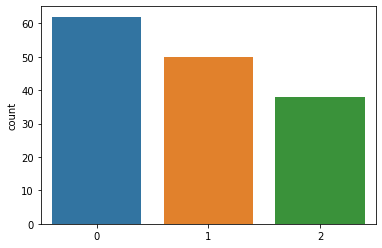

In [54]:
sns.countplot(kmeans.labels_)

C:\Users\boyka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

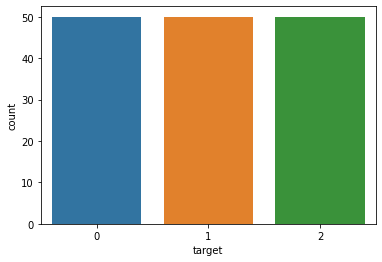

In [55]:
sns.countplot(df['target'])

In [56]:
kmeans

KMeans(n_clusters=3)

C:\Users\boyka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

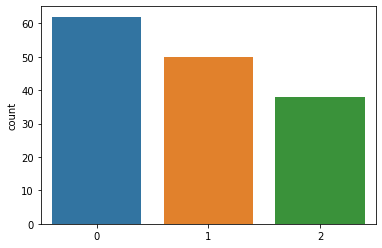

In [57]:
kmeans = KMeans(n_clusters = 3, max_iter = 500)
cluster_data = kmeans.fit_transform(df.loc[:, 'sepal length (cm)' : 'petal width (cm)'])
sns.countplot(kmeans.labels_)

-----

## DBSCAN (Density-based spatial clustering of applications with noise)

Density-based clustering

- A method of clustering high-density parts
- If there are more than n points within a radius x from a point, it is recognized as a single cluster.
- The number of n_cluster must be specified in KMeans, but not required in DBSCAN
- It also finds geometric clustering well


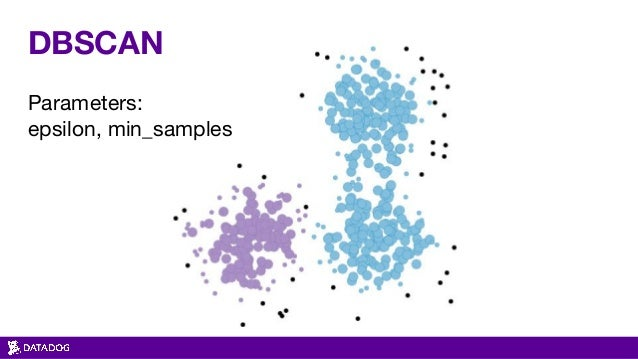

In [58]:
Image('https://image.slidesharecdn.com/pydatanyc2015-151119175854-lva1-app6891/95/pydata-nyc-2015-automatically-detecting-outliers-with-datadog-26-638.jpg')

-----

In [60]:
from sklearn.cluster import DBSCAN

In [61]:
dbscan = DBSCAN(eps = 0.6, min_samples = 2)

In [62]:
dbscan_data = dbscan.fit_predict(df.loc[:, 'sepal length (cm)' : 'petal width (cm)'])

In [63]:
dbscan_data

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  3,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

-----

## Silhouette Score (Clustering Assessment)

An indicator that quantitatively evaluates the quality of clustering.

- 1: The quality of clustering is good
- 0: poor quality of clustering (no meaning of clustering)
- negative: misclassified

-----

In [64]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [65]:
score = silhouette_score(data_scaled, kmeans.labels_)

In [66]:
score

0.44366157397640527

In [70]:
samples = silhouette_samples(data_scaled, kmeans.labels_)

In [71]:
samples[:5]

array([0.73318987, 0.57783809, 0.68201014, 0.62802187, 0.72693222])

-----

In [72]:
def plot_silhouette(X, num_cluesters):
    for n_clusters in num_cluesters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
    
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
    
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
    
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')
    
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')
    
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
    
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
    
        plt.show()

-----

For n_clusters = 2 The average silhouette_score is : 0.5817500491982808


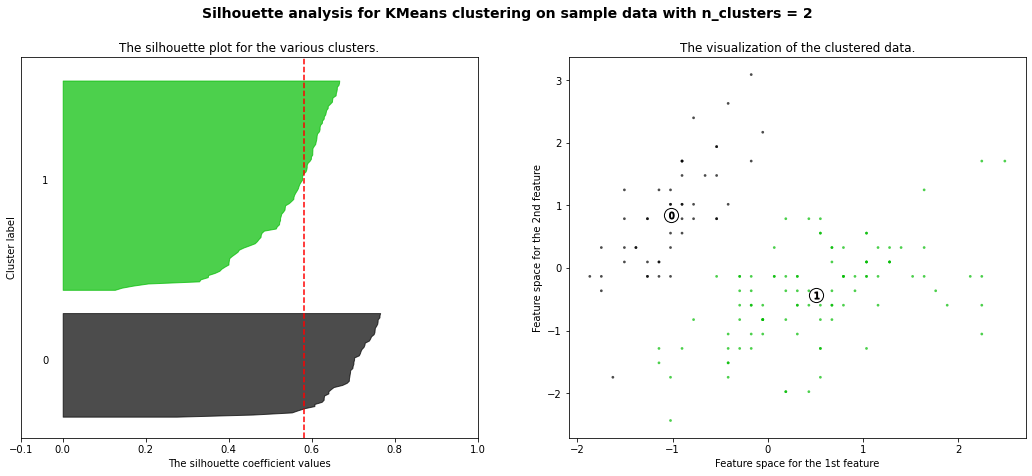

For n_clusters = 3 The average silhouette_score is : 0.45994823920518635


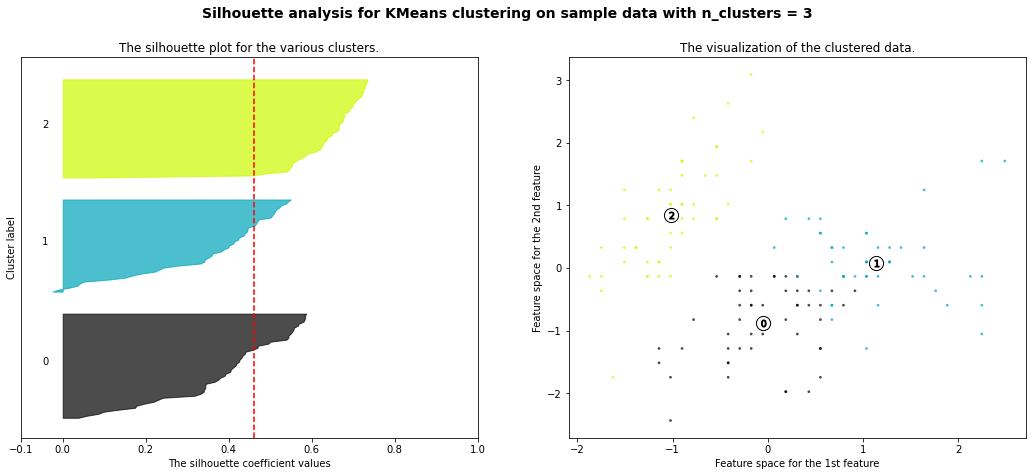

For n_clusters = 4 The average silhouette_score is : 0.383850922475103


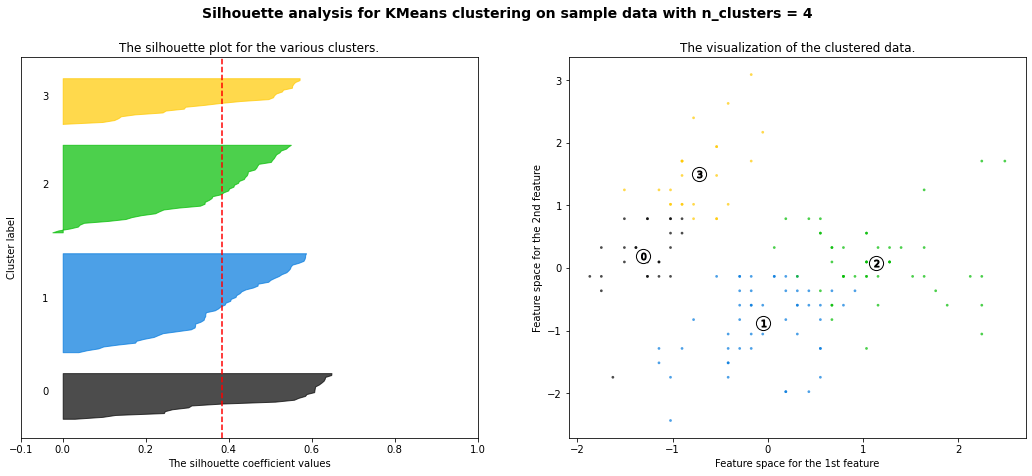

For n_clusters = 5 The average silhouette_score is : 0.34273996820787694


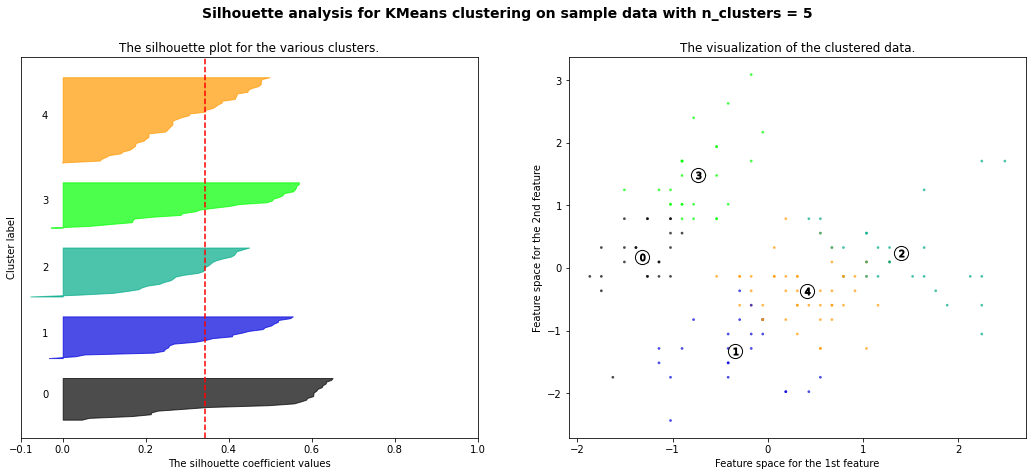

In [73]:
plot_silhouette(data_scaled, [2, 3, 4, 5])